In [46]:
import numpy as np
from decision_tree import calculate_information_gain, decision_tree_train, decision_tree_predict
from naive_bayes import naive_bayes_train, naive_bayes_predict
from load_all_data import load_all_data
from crossval import cross_validate
import random
import matplotlib.pyplot as plt

d = 5000 # Maximum number of features

In [47]:
train_data, test_data, train_labels, test_labels = load_all_data()

train_data = train_data.T
test_data = test_data.T

In [48]:
#print the shape of train_data and test_data, and the shape of train_labels and test_labels
print(train_data.shape)
print(test_data.shape)
print('------')
print(train_labels.shape)
print(test_labels.shape)


(784, 38000)
(784, 4000)
------
(38000,)
(4000,)


In [31]:
# Filter features by information gain

gain = calculate_information_gain(train_data, train_labels)

print(gain)

# sort features by calculated information gain
ranks = gain.argsort()[::-1]

train_data = train_data[ranks[:d], :]
test_data = test_data[ranks[:d], :]

# randomly shuffle data
num_training = train_data.shape[1] #Get the number of rows

order = list(range(num_training))
random.shuffle(order)

train_data = train_data[:, order]
train_labels = train_labels[order]

[ 3.42198492e-13  3.42198492e-13  3.42198492e-13  3.42198492e-13
  3.42198492e-13  3.42198492e-13  3.42198492e-13  3.42198492e-13
  3.42198492e-13  3.42198492e-13  3.42198492e-13  3.42198492e-13
  6.82395868e-03  2.04851440e-02  1.33191090e-02  5.48932295e-04
  3.42198492e-13  3.42198492e-13  3.42198492e-13  3.42198492e-13
  3.42198492e-13  3.42198492e-13  3.42198492e-13  3.42198492e-13
  3.42198492e-13  3.42198492e-13  3.42198492e-13  3.42198492e-13
  3.42198492e-13  3.42198492e-13  3.42198492e-13  3.42198492e-13
  9.78833076e-04  3.37162292e-03  2.77332548e-02  7.23563138e-02
  1.22498072e-01  1.51444795e-01  3.36323917e-01  3.97966788e-01
  4.24142563e-01  3.96354131e-01  3.64566670e-01  3.36405547e-01
  3.27539247e-01  3.37660574e-01  3.20745514e-01  1.81527464e-01
  1.10096781e-01  1.74982796e-02  2.02138281e-02  1.31050210e-02
  3.42198492e-13  3.42198492e-13  3.42198492e-13  3.42198492e-13
  3.42198492e-13  3.42198492e-13  3.92520048e-03  1.77369771e-03
  1.79553311e-02  1.37476

In [32]:
# prune data to even smaller (since decision tree takes much longer to train)

d = 250

train_data_small = train_data[:d, :]
test_data_small = test_data[:d, :]

# Apply cross-validation on training data to select hyper-parameter (max depth) of decision trees
depth_values = np.array([2, 4, 8, 16, 32, 64])

cv_score = np.zeros(depth_values.size)

params = dict()

for i in range(depth_values.size):
    params['max_depth'] = depth_values[i]
    cv_score[i], _ = cross_validate(decision_tree_train, decision_tree_predict, 
                                 train_data_small, train_labels, 3, params)

Text(0.5, 1.0, 'Decision Tree Cross-Validation Accuracy')

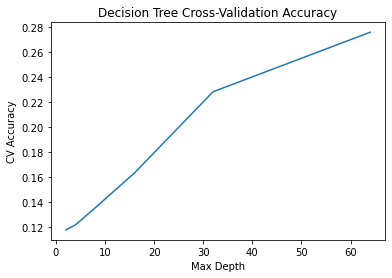

In [33]:
plt.plot(depth_values, cv_score)
plt.xlabel('Max Depth')
plt.ylabel('CV Accuracy')
plt.title('Decision Tree Cross-Validation Accuracy')

In [34]:
# Try naive Bayes 
nb_params = {}
nb_model = naive_bayes_train(train_data, train_labels, nb_params)


# Compute training accuracy
nb_train_predictions = naive_bayes_predict(train_data, nb_model)
nb_train_accuracy = np.mean(nb_train_predictions == train_labels)
print("Naive Bayes training accuracy: %f" % nb_train_accuracy)


# Compute testing accuracy
nb_test_predictions = naive_bayes_predict(test_data, nb_model)
nb_test_accuracy = np.mean(nb_test_predictions == test_labels)
print("Naive Bayes testing accuracy: %f" % nb_test_accuracy)

Naive Bayes training accuracy: 0.649763
Naive Bayes testing accuracy: 0.652750


In [35]:
# Train on full training data with best depth

best_depth_index = cv_score.argmax()

params['max_depth'] = depth_values[best_depth_index]

dt_model = decision_tree_train(train_data, train_labels, params)

In [36]:
# Compute testing accuracy

dt_predictions = decision_tree_predict(test_data, dt_model)

dt_accuracy = np.mean(dt_predictions == test_labels)

print("Decision tree testing accuracy: %f" % dt_accuracy)

Decision tree testing accuracy: 0.292000


In [37]:
# Training Perceptron algorithm
from __future__ import division
import numpy as np
import pylab as plt
from linearclassifier import linear_predict, perceptron_update, plot_predictions, log_reg_train
from scipy.io import loadmat



In [45]:
# load cardio data from MATLAB data file

variables = dict()
loadmat('processedCardio.mat', variables)

train_labels1 = variables['trainLabels'].ravel() - 1 # the original MATLAB data was 1-indexed
test_labels1 = variables['testLabels'].ravel() - 1
train_data1 = variables['trainData']
test_data1 = variables['testData']

train_labels = trainLabels.ravel() - 1 # the original MATLAB data was 1-indexed
test_labels = variables['testLabels'].ravel() - 1
train_data = variables['trainData']
test_data = variables['testData']
# get data dimensions and sizes
#num_dim, num_train = train_data.shape
#_, num_test = test_data.shape

#classes = np.unique(train_labels)
#num_classes = len(classes)
#print(num_classes) # meaning 10 digits

print(train_data.shape)
print(test_data.shape)
print('------')
print(train_labels.shape)
print(test_labels.shape)

print(train_data1.shape)
print(test_data1.shape)
print('------')
print(train_labels1.shape)
print(test_labels1.shape)

(784, 38000)
(784, 4000)
------
(38000,)
(4000,)
(22, 1276)
(22, 850)
------
(1276,)
(850,)


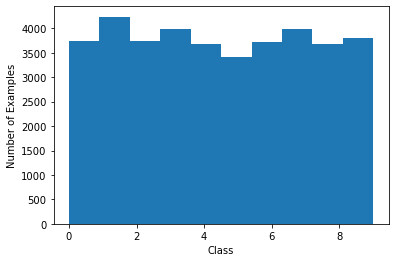

In [39]:
plt.hist(train_labels)
plt.xlabel('Class')
plt.ylabel('Number of Examples')
plt.show()

In [50]:
# Perceptron experiment

epochs = 40
lambda_val = 1

model = { 'weights': np.zeros((num_dim, num_classes)) }
params = {'lambda': lambda_val}
train_accuracy = np.zeros(epochs)
test_accuracy = np.zeros(epochs)

for epoch in range(epochs):
    # first measure training and testing accuracy
    predictions = linear_predict(train_data, model)
    train_accuracy[epoch] = np.sum(predictions == train_labels) / num_train

    predictions = linear_predict(test_data, model)
    test_accuracy[epoch] = np.sum(predictions == test_labels) / num_test

    # run perceptron training
    mistakes = 0
    for i in range(num_train):
        correct = perceptron_update(train_data[:, i], model, params, train_labels[i])
        
        if not correct:
            mistakes += 1
    
    print("Finished epoch %d with %d mistakes." % (epoch, mistakes))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [44]:
# Perceptron experiment

epochs = 1000
lambda_val = 1

p_model = { 'weights': np.zeros((num_dim, num_classes)) }
params = {'lambda': lambda_val}
train_accuracy = np.zeros(epochs)
test_accuracy = np.zeros(epochs)

for epoch in range(epochs):
    # first measure training and testing accuracy
    predictions = linear_predict(train_data, p_model)
    train_accuracy[epoch] = np.sum(predictions == train_labels) / num_train

    predictions = linear_predict(test_data, p_model)
    test_accuracy[epoch] = np.sum(predictions == test_labels) / num_test

    # run perceptron training
    mistakes = 0
    for i in range(num_train):
        correct = perceptron_update(train_data[:, i], p_model, params, train_labels[i])
        
        if not correct:
            mistakes += 1
    
    print("Finished epoch %d with %d mistakes." % (epoch, mistakes))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

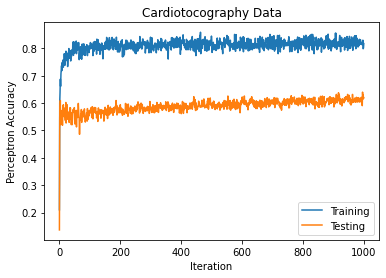

Train Accuracy: 0.817398
Test Accuracy: 0.618824


In [26]:
# Plot results of perceptron

train_line = plt.plot(range(epochs), train_accuracy, label="Training")
test_line = plt.plot(range(epochs), test_accuracy, label="Testing")
plt.title('Cardiotocography Data')
plt.xlabel('Iteration')
plt.ylabel('Perceptron Accuracy')
plt.legend()

plt.show()

print("Train Accuracy: %f" % train_accuracy[epochs-1])
print("Test Accuracy: %f" % test_accuracy[epochs-1])

In [27]:
# Logistic regression gradient check

# first check if the gradient and objective function are consistent with each other
_ = log_reg_train(train_data, train_labels, 
              {'weights': np.random.randn(num_dim * num_classes)}, check_gradient=True)

# Logistic regression experiment

model = {'weights': np.zeros((num_dim, num_classes))}
    
model = log_reg_train(train_data, train_labels, model)
        
train_predictions = linear_predict(train_data, model)
train_accuracy = np.sum(train_predictions == train_labels) / num_train

test_predictions = linear_predict(test_data, model)
test_accuracy = np.sum(test_predictions == test_labels) / num_test
    
print("Train Accuracy: %f" % train_accuracy)
print("Test Accuracy: %f" % test_accuracy)

Provided gradient differed from numerical approximation by 9.814375e-04 (should be around 1e-3 or less)
Train Accuracy: 0.899687
Test Accuracy: 0.635294


## SVM (Support Vector Machine)